In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 修改默认字体
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [39]:
# 定义全局变量
miu = 0.011
g = 9.8
m_ren=70
m_che=7
m = m_ren + m_che
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
rou = 1.205   # kg/m^3

sigma1 = 42 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出

W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

In [65]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*rou*s*v*v

def f_zu(v):
    return f1 + f2(v)

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

# P功率最大维持时间
def T(P):
    return W_max / ( (2.38969595e-06*(P-sigma1)**3+3.2) *P)

# 添加k的时间
def T_new(P,k):
    return W_max / ( (2.38969595e-06*( (P-sigma1)/(1-k) )**3+3.2) *( (P-sigma1)/(1-k)+sigma1) )

# 要休息的时间
def T_rest(P):
    if P < 188:
        return 600 * 0.5
    else:
        return ((P-139)*(-9.76562500e-04*P + 1.18359375e+00))/97 * T(P) * 0.5

# 坡度到角度
def po2jd(po):
    return math.atan(po)/math.pi*180


45.0


In [41]:
# 初始化挡位
dangwei=[]
dangwei_len=1000
for i in range(dangwei_len):
    dangwei.append(random.randint(1,7))


p_dw=[]
pp_temp=np.asarray([42,100,200,300,400,500,600,700])

p_dw_time = [17883, 600, 951, 181, 53, 20, 9, 5] 
p_dw_tr = [0, 1, 297, 120, 62, 43, 36, 34] 
p_dw_t_all = np.asarray(p_dw_time)  + np.asarray(p_dw_tr)

# p_dw矩阵初始化
for i in range(10):
    kkk = 0.1 * i
    p_dw.append( np.round((pp_temp-42)*(1-kkk) + 42,0) )
# print(p_dw)
v_dw=[
    [5.7,9.1,12.5,14.8,16.5,18.0,19.4,20.4],
    [5.7,8.8,12.1,14.2,15.9,17.4,18.6,19.7],
    [5.7,8.6,11.6,13.7,15.3,16.7,17.9,18.9],
    [5.7,8.3,11.1,13.1,14.6,15.9,17.1,18.1],
    [5.7,8.0,10.6,12.4,13.9,15.1,16.2,17.1],
    [5.7,7.7,10.0,11.7,13.0,14.2,15.2,16.1],
    [5.7,7.3,9.3,10.9,12.1,13.1,14.0,14.9],
    [5.7,6.9,8.6,9.9,11.0,11.9,12.7,13.5],
    [5.7,6.6,7.8,8.8,9.7,10.5,11.2,11.8],
    [5.7,6.1,6.8,6.8,7.5,8.6,9.0,9.5],
    [5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7]
]
v_a = v_dw
for kkk in range(0,10):
    kkk /= 10
    for i in range(1,8):
        v_a[int(kkk*10)][i] = (p_dw_time[i] * v_dw[int(kkk*10)][i] + 42 * 5.7) / (p_dw_time[i] + p_dw_tr[i])
# print(v_a)

p_bt_k = [2,2,4,5,5,6,6,7,7,7]  # k为0-0.9时的最佳挡位

# for i in range(len(v_a)):
#     plt.plot(v_a[i],label="k="+str(i/10 ))
#     print(v_a[i].index(max(v_a[i])))
# plt.legend()
# plt.show()

In [63]:
# 初始化转弯
turn=[[2000,5000],[7000,10000]]
v_limit=[1,5]

# 初始化坡度
slope = [0,	2.7, 4.9, 10.3, 15.5, 17.5, 22.1, 24.8, 27, 32.4, 37.6, 39.6, 44.2]
slope_angle = [-0.036296296, -0.017272727, 0.040925926,	-0.033846154, 0.045, 0.000217391,
	-0.036296296,  -0.017272727,   0.040925926,  -0.033846154,  0.045,  0.000217391]

# 初始化  目前不需要休息时间
flag=1      #  判断结束后退出的标志
j = 0  # 标志挡位改变的标记

t=[]    # 时间
v=[]    # 速度
p=[]    # 功率
x=[]    # 路程
f=[]    # 阻力
k=[]    # 记录取整的k
E=[]    # 消耗的能量
kk=[]   # 记录未取整的k
sigma=[]

# 添加初始值
kk.append(0)
t.append(0)
v.append(0)
k.append(0)
p_new = p_dw[int(k[0]/0.1)][dangwei[j]]
p.append(p_new)
x.append(0)
f.append(f1)

E.append(0)

sigma.append(sigma2(p[0]))

stay = p_dw_time[dangwei[j]]  # 该挡位可持续时间
stay2= p_dw_t_all[dangwei[j]] # 加上所需42W休息时间

# 开始迭代
for i in range(1,5000):
    t_temp = t[i-1]+1;  t.append(t_temp)
    # 确定此时的P
    if i<=stay:
        p_temp = p_dw[int(k[i-1]/0.1)][dangwei[j]]
        # k_temp = (k[i-1]); k.append(k_temp//0.1 /10); 
        # kk.append(k_temp)
    elif i >stay and i < stay2:
        p_temp = sigma1
    elif i==stay2:
        p_temp = p_dw[int(k[i-1]/0.1)][dangwei[j+1]]
        p_new = p_dw[int(k[i-1]/0.1)][dangwei[j+1]]
        j+=1  # 下次取下一个挡位
        stay = stay2 + p_dw_time[dangwei[j]]
        stay2 = stay2 + p_dw_t_all[dangwei[j]]
        
    k_temp = (E[i-1] / 2e6); 
    if k_temp < 0.991:
        k.append(k_temp//0.1 /10); 
    else:
        k.append(0.99)

    p.append(p_temp)

    v_temp = math.sqrt( 2*(p[i-1]-f[i-1]*v[i-1])/m + v[i-1]**2 )
    x_temp = x[i-1] + (v[i-1] + v_temp)/2
    if len(turn)>0:
        if x_temp>=turn[0][1]:
            del turn[0]
            del v_limit[0]
        elif x_temp >= turn[0][0] and x_temp <turn[0][1]:
            v_temp = v_limit[0]
            x_temp = x_temp = x[i-1] + (v[i-1] + v_temp)/2

    v.append(v_temp)
    x.append(x_temp)

    f_temp = f_zu(v[i]) + 5;    f.append(f_temp)
    E_temp = E[i-1] + p[i-1] - sigma1;  E.append(E_temp)

    # print('时刻i: ', i, ' stay=',stay, ' t=',t[i],' p=',p[i],' v=',v[i],' x=',x[i],' f=',f[i],' E=',E[i],' k=',k[i])
    print('时刻i: ', i, ' stay=',stay, ' stay2=',stay2,' dw=',dangwei[j],' p=',p[i],' v=',v[i],' x=',x[i],' k=',k[i])


时刻i:  1  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 3.947710169758614  x= 1.973855084879307  k= 0.0
时刻i:  2  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 5.468146659486095  x= 6.6817834995016625  k= 0.0
时刻i:  3  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 6.60208415484267  x= 12.716898906666046  k= 0.0
时刻i:  4  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 7.531154431209594  x= 19.78351819969218  k= 0.0
时刻i:  5  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 8.326211818964413  x= 27.71220132477918  k= 0.0
时刻i:  6  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 9.023864678017166  x= 36.387239573269966  k= 0.0
时刻i:  7  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 9.646050663313249  x= 45.72219724393517  k= 0.0
时刻i:  8  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 10.207212756684067  x= 55.64882895393383  k= 0.0
时刻i:  9  stay= 9  stay2= 45  dw= 6  p= 600.0  v= 10.717505935895218  x= 66.11118830022347  k= 0.0
时刻i:  10  stay= 9  stay2= 45  dw= 6  p= 42  v= 11.184427603505277  x= 77.06215506992372  k= 0.0
时刻i:  11  stay= 9  stay2= 4

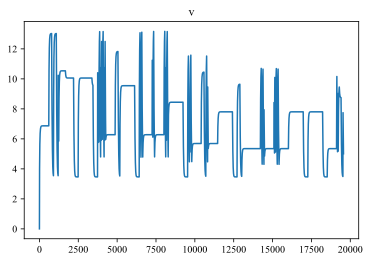

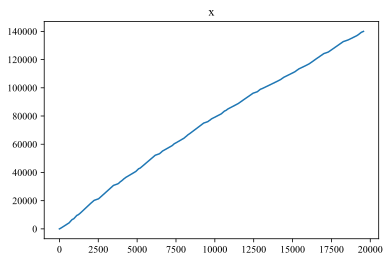

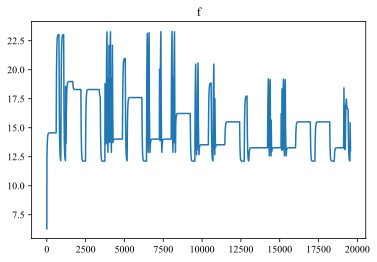

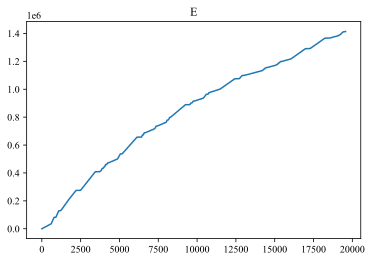

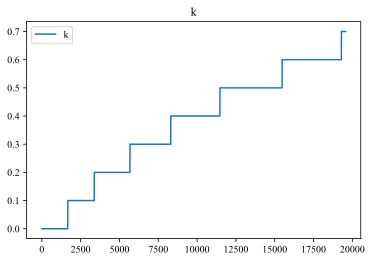

In [32]:
# 绘图

plt.plot(t,v)
plt.title("v")
plt.show()

plt.plot(t,x)
plt.title("x")
plt.show()

plt.plot(t,f)
plt.title("f")
plt.show()

plt.plot(t,E)
plt.title("E")
plt.show()

plt.plot(t,k,label='k')
# plt.plot(t,kk,label="k'")

plt.title("k")
plt.legend()
plt.show()
